# Project Description: Twitter US Airline Sentiment, Natural Language Processing



<b>Data Description:</b> 

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").


<b>Dataset:</b> 

The project is from a dataset from Kaggle. Link to the Kaggle project site:https://www.kaggle.com/crowdflower/twitter-airline-sentiment The dataset has to be downloaded from the above Kaggle website.

The dataset has the following columns:
- tweet_id 
- airline_sentiment 
- airline_sentiment_confidence 
- negative reason
- negativereason_confidence 
- airline  
- airline_sentiment_gold  
- name 
- negativereason_gold 
- retweet_count  
- text  
- tweet_coord  
- tweet_created  
- tweet_location 
- user_timezone


<b>Objective:</b> 

To implement the techniques learnt as a part of the course.


<b>Learning Outcomes:</b>
- Basic understanding of text pre-processing.
- What to do after text pre-processing: 
- Bag of wordsoTf-idf
- Build the classification model.
- Evaluate the Model.Steps and tasks:

<b>Tasks:</b>

1. Import the libraries, load dataset, print shape of data, data description (5 Marks)
2. Understand of data-columns (5 Marks)<br>     
        a. Drop all other columns except “text”and “airline_sentiment”.     
        b. Check the shape of data.     
        c. Print first 5 rows of data.
3. Text pre-processing: Data preparation (20 Marks)
    
        a. Html tag removal.    
        b. Tokenization.     
        c. Remove the numbers.     
        d. Removal of Special Characters and Punctuations.     
        e. Conversion to lowercase.     
        f. Lemmatize or stemming.    
        g. Join the words in the list to convert back to text string in the dataframe. (So that each row contains the data in text format.)     
        h. Print first 5 rows of data after pre-processing. 
4. Vectorization (10 Marks)<br>
        a. Use CountVectorizer.<br>     
        b. Use TfidfVectorizer.<br> 
5. Fit and evaluate model using both type of vectorization (6+6 Marks)
6. Summarize your understanding of the application of Various Pre-processing and Vectorization and performance of your model on this dataset (8 Marks)



### Import the libraries, load dataset, print shape of data, data description 

In [1]:
#import libraries
import numpy as np
import pandas as pd
import re, string, unicodedata
import nltk
import textsearch
import contractions
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
#import data and display first 5 rows
data = pd.read_csv('Tweets.csv')
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [3]:
#display shape of data and description
print('The shape of the data is', data.shape)
display(data.describe())
print(data.info())

The shape of the data is (14640, 15)


,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
tweet_id                        14640 non-null int64
airline_sentiment               14640 non-null object
airline_sentiment_confidence    14640 non-null float64
negativereason                  9178 non-null object
negativereason_confidence       10522 non-null float64
airline                         14640 non-null object
airline_sentiment_gold          40 non-null object
name                            14640 non-null object
negativereason_gold             32 non-null object
retweet_count                   14640 non-null int64
text                            14640 non-null object
tweet_coord                     1019 non-null object
tweet_created                   14640 non-null object
tweet_location                  9907 non-null object
user_timezone                   9820 non-null object
dtypes: float64(2), int64(2), object(11)
memory usage: 1.7+ MB
None


### Understand of data-columns (5 Marks)
 a. Drop all other columns except “text”and “airline_sentiment”.     
 b. Check the shape of data.     
 c. Print first 5 rows of data.

In [4]:
#create new dataframe with only text and airline sentiment columns
sentiment = data[['text','airline_sentiment']]
print('The shape is', sentiment.shape)
display(sentiment.head())

The shape is (14640, 2)


,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


### Text pre-processing: Data preparation (20 Marks)

 a. Html tag removal.    
 b. Tokenization.     
 c. Remove the numbers.     
 d. Removal of Special Characters and Punctuations.     
 e. Conversion to lowercase.     
 f. Lemmatize or stemming.    
 g. Join the words in the list to convert back to text string in the dataframe. (So that each row contains the data in text format.)     
 h. Print first 5 rows of data after pre-processing. 


In [5]:
# The next several steps will individually build a function, test on the dataframe to ensure it's working properly and without error
# then combine the functions at the end and save as a new dataframe that's ready for preprocessing


In [6]:
#remove html tags
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

In [7]:
#check to make sure function runs on dataframe
sentiment['text'].apply(strip_html)

0                      @VirginAmerica What @dhepburn said.
1        @VirginAmerica plus you've added commercials t...
2        @VirginAmerica I didn't today... Must mean I n...
3        @VirginAmerica it's really aggressive to blast...
4        @VirginAmerica and it's a really big bad thing...
5        @VirginAmerica seriously would pay $30 a fligh...
6        @VirginAmerica yes, nearly every time I fly VX...
7        @VirginAmerica Really missed a prime opportuni...
8          @virginamerica Well, I didn't…but NOW I DO! :-D
9        @VirginAmerica it was amazing, and arrived an ...
10       @VirginAmerica did you know that suicide is th...
11       @VirginAmerica I <3 pretty graphics. so much b...
12       @VirginAmerica This is such a great deal! Alre...
13       @VirginAmerica @virginmedia I'm flying your #f...
14                                  @VirginAmerica Thanks!
15           @VirginAmerica SFO-PDX schedule is still MIA.
16       @VirginAmerica So excited for my first cross c.

In [8]:
#define function for replacing contractions using the contractions library
def replace_contractions(text):
    return contractions.fix(text)

In [9]:
#check to make sure function runs on dataframe
sentiment['text'].apply(replace_contractions)

0                      @VirginAmerica What @dhepburn said.
1        @VirginAmerica plus you have added commercials...
2        @VirginAmerica I did not today... Must mean I ...
3        @VirginAmerica it is really aggressive to blas...
4        @VirginAmerica and it is a really big bad thin...
5        @VirginAmerica seriously would pay $30 a fligh...
6        @VirginAmerica yes, nearly every time I fly VX...
7        @VirginAmerica Really missed a prime opportuni...
8         @virginamerica Well, I did not…but NOW I DO! :-D
9        @VirginAmerica it was amazing, and arrived an ...
10       @VirginAmerica did you know that suicide is th...
11       @VirginAmerica I &lt;3 pretty graphics. so muc...
12       @VirginAmerica This is such a great deal! Alre...
13       @VirginAmerica @virginmedia I am flying your #...
14                                  @VirginAmerica Thanks!
15           @VirginAmerica SFO-PDX schedule is still MIA.
16       @VirginAmerica So excited for my first cross c.

In [10]:
#import tokenizer
from nltk.tokenize import word_tokenize

import nltk

#define tokenizer function
def tokenizer(text):
    tkn = word_tokenize(text)
    return tkn

In [11]:
#tokenize data after applying first two functions
sent_token = sentiment['text'].apply(strip_html).apply(replace_contractions).apply(tokenizer)
sent_token

0           [@, VirginAmerica, What, @, dhepburn, said, .]
1        [@, VirginAmerica, plus, you, have, added, com...
2        [@, VirginAmerica, I, did, not, today, ..., Mu...
3        [@, VirginAmerica, it, is, really, aggressive,...
4        [@, VirginAmerica, and, it, is, a, really, big...
5        [@, VirginAmerica, seriously, would, pay, $, 3...
6        [@, VirginAmerica, yes, ,, nearly, every, time...
7        [@, VirginAmerica, Really, missed, a, prime, o...
8        [@, virginamerica, Well, ,, I, did, not…but, N...
9        [@, VirginAmerica, it, was, amazing, ,, and, a...
10       [@, VirginAmerica, did, you, know, that, suici...
11       [@, VirginAmerica, I, <, 3, pretty, graphics, ...
12       [@, VirginAmerica, This, is, such, a, great, d...
13       [@, VirginAmerica, @, virginmedia, I, am, flyi...
14                           [@, VirginAmerica, Thanks, !]
15       [@, VirginAmerica, SFO-PDX, schedule, is, stil...
16       [@, VirginAmerica, So, excited, for, my, first.

In [12]:
#remove non ascii characters and punctuation, convert to lowercase
def remove_chars_punct(words):
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        #remove non ascii characters
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        #replace punctuation with space
        new_word2 = re.sub(r'[^\w\s]', '', new_word)
        #remove numbers
        new_word3 = re.sub(r'[\d+]', '', new_word2)
        #convert to lowercase
        new_word = new_word3.lower()
        if new_word != '':
            new_words.append(new_word)    # Append processed words to new list.
    return new_words
    

In [13]:
#verify function works as expected
sent_token.apply(remove_chars_punct)

0                    [virginamerica, what, dhepburn, said]
1        [virginamerica, plus, you, have, added, commer...
2        [virginamerica, i, did, not, today, must, mean...
3        [virginamerica, it, is, really, aggressive, to...
4        [virginamerica, and, it, is, a, really, big, b...
5        [virginamerica, seriously, would, pay, a, flig...
6        [virginamerica, yes, nearly, every, time, i, f...
7        [virginamerica, really, missed, a, prime, oppo...
8        [virginamerica, well, i, did, notbut, now, i, ...
9        [virginamerica, it, was, amazing, and, arrived...
10       [virginamerica, did, you, know, that, suicide,...
11       [virginamerica, i, pretty, graphics, so, much,...
12       [virginamerica, this, is, such, a, great, deal...
13       [virginamerica, virginmedia, i, am, flying, yo...
14                                 [virginamerica, thanks]
15       [virginamerica, sfopdx, schedule, is, still, mia]
16       [virginamerica, so, excited, for, my, first, c.

In [14]:
#import stopwords and lemmatizer
from nltk.corpus import stopwords, wordnet   
from nltk.stem import WordNetLemmatizer

In [15]:
#define function to remove stopwords
def remove_stopwords(words):
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        if word not in stopwords.words('english'):
            new_words.append(word)        # Append processed words to new list.
    return new_words


#define function to lematize verbs
def lemmatize_verbs(words):
    lemmatizer = WordNetLemmatizer()
    lemmas = []                           # Create empty list to store pre-processed words.
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)              # Append processed words to new list.
    return lemmas

In [16]:
#apply the functions to remove punctuation/chars/numbers, remove stopwords, and lemmatize the verbs, store as final sentiment Series
final_sentiment = sent_token.apply(remove_chars_punct).apply(remove_stopwords, lemmatize_verbs)

In [17]:
#flatten list to string of words
for i in final_sentiment.index:
    final_sentiment[i] = " ".join(final_sentiment[i])
    
final_sentiment

0                              virginamerica dhepburn said
1        virginamerica plus added commercials experienc...
2        virginamerica today must mean need take anothe...
3        virginamerica really aggressive blast obnoxiou...
4                       virginamerica really big bad thing
5        virginamerica seriously would pay flight seats...
6        virginamerica yes nearly every time fly vx ear...
7        virginamerica really missed prime opportunity ...
8                                virginamerica well notbut
9            virginamerica amazing arrived hour early good
10       virginamerica know suicide second leading deat...
11       virginamerica pretty graphics much better mini...
12       virginamerica great deal already thinking nd t...
13       virginamerica virginmedia flying fabulous sedu...
14                                    virginamerica thanks
15                 virginamerica sfopdx schedule still mia
16       virginamerica excited first cross country flig.

In [18]:
#merge preprocessed text into sentiment dataframe
sentiment['text'] = final_sentiment
sentiment

C:\Users\jharnack\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,text,airline_sentiment
0,virginamerica dhepburn said,neutral
1,virginamerica plus added commercials experienc...,positive
2,virginamerica today must mean need take anothe...,neutral
3,virginamerica really aggressive blast obnoxiou...,negative
4,virginamerica really big bad thing,negative
5,virginamerica seriously would pay flight seats...,negative
6,virginamerica yes nearly every time fly vx ear...,positive
7,virginamerica really missed prime opportunity ...,neutral
8,virginamerica well notbut,positive
9,virginamerica amazing arrived hour early good,positive


### Vectorization 
 a. Use CountVectorizer     
 b. Use TfidfVectorizer 
 
 ### Fit and evaluate model using both type of vectorization 


In [27]:
#import libraries from sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

#import randomforest classifier and relevant metrics from sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

In [28]:
# a) use CountVectorizer 
count_vectorizer = CountVectorizer(max_features=100)                
count_data = count_vectorizer.fit_transform(sentiment['text'])
display(count_data) 

#convert from sparse matrix to array and print shape
count_data = count_data.toarray()
display(count_data)
print(count_data.shape)

<14640x100 sparse matrix of type '<class 'numpy.int64'>'
	with 55606 stored elements in Compressed Sparse Row format>

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

(14640, 100)


In [29]:
#import train test split
from sklearn.model_selection import train_test_split

#create target variable, y, for sentiment
labels = sentiment['airline_sentiment']

#split data into testing and training set
X_train, X_test, y_train, y_test = train_test_split(count_data, labels, test_size=0.3, random_state=42)

In [30]:
#create and fit model
forest = RandomForestClassifier(n_estimators=100, n_jobs=10)
forest = forest.fit(X_train, y_train)

#evaluate model using cross validation metric
print(forest)
print('The cross validation score of the model is', np.mean(cross_val_score(forest, count_data, labels, cv=10)).round(2))

RandomForestClassifier(n_jobs=10)
The cross validation score of the model is 0.67


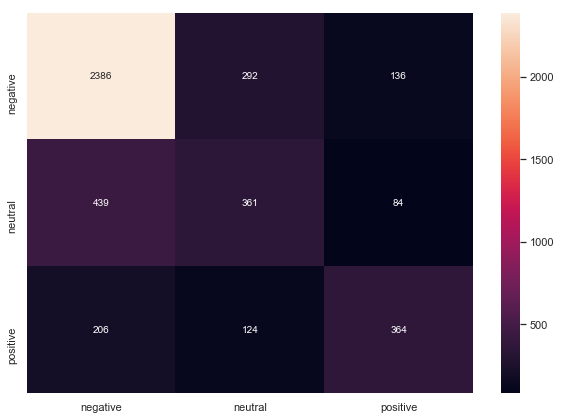

In [31]:
# predict results
result = forest.predict(X_test)

# evaluate model and display with confusion matrix
cm = confusion_matrix(y_test, result)

cv_cm = pd.DataFrame(cm, index = ['negative', 'neutral', 'positive'], columns = ['negative', 'neutral', 'positive'])
plt.figure(figsize = (10,7))
sns.heatmap(cv_cm, annot=True, fmt='g')
plt.show()

In [32]:
# b) repeate above using TfidfVectorizer
tfidf_vectorizier = TfidfVectorizer(max_features = 100)
tfidf_data = tfidf_vectorizier.fit_transform(sentiment['text'])
display(tfidf_data) 

#convert from sparse matrix to array and print shape
tfidf_data = tfidf_data.toarray()
display(tfidf_data)
print(tfidf_data.shape)

<14640x100 sparse matrix of type '<class 'numpy.float64'>'
	with 55606 stored elements in Compressed Sparse Row format>

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

(14640, 100)


In [33]:
#split data into testing and training set
X_train, X_test, y_train, y_test = train_test_split(tfidf_data, labels, test_size=0.3, random_state=42)

RandomForestClassifier(max_depth=10, n_jobs=10)
The cross validation score is 0.66


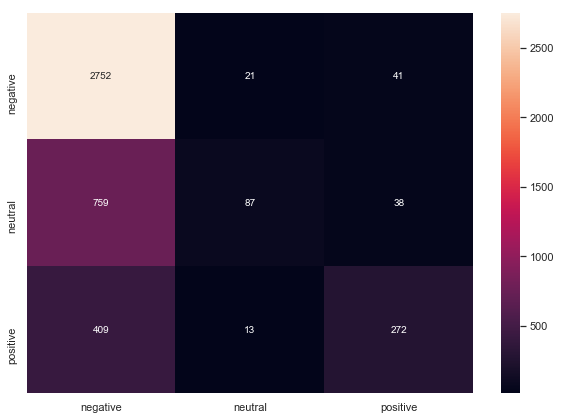

In [34]:
#create random forest model
forest = RandomForestClassifier(n_estimators=100, max_depth = 10, n_jobs=10)
forest = forest.fit(X_train, y_train)

print(forest)
print('The cross validation score is', np.mean(cross_val_score(forest, count_data, labels, cv=10)).round(2))

# predict results
result = forest.predict(X_test)

# evaluate model and display with confusion matrix
cm = confusion_matrix(y_test, result)

cv_cm = pd.DataFrame(cm, index = ['negative', 'neutral', 'positive'], columns = ['negative', 'neutral', 'positive'])
plt.figure(figsize = (10,7))
sns.heatmap(cv_cm, annot=True, fmt='g')
plt.show()

### Summarize your understanding of the application of Various Pre-processing and Vectorization and performance of your model on this dataset 

This project was separated into 3 main steps: 1) pre-processing text for Twitter posts regarding airline sentiment, 2) converting the text into a numerical representation, and 3) feeding that numerical representation into a supervised learning classification model (Random Forest was chosen).

1) Pre-processing of text: removing special characters, stop words, converting to lowercase, and then tokenizing and lemmatizing the words extracts the most impactful words from the text. The "@" symbol commonly used in tweets, html links, stop words like "and"/"the", will have very little impact on the model and understanding of user sentiment. Lemmitzation provides a consistent root word for the verbs (liking, likes, liked == "like"), making them easier to count in the next step. 

2) Converting text via vectorization: The intent of the vectorization methods is to create a numerical representation of the words based on their impact and frequency. For example, if the word "good" is used many times in tweets classified as "positive" sentiment, then that word would have a high correlation with positive tweets and is valuable input to the model.

3) Prediction using supervised learning model: This problem gave us a set of data that was already classified as positive, neutral, or negative. By training the random forest model on the data, we were able to estimate the user sentiment based on some of these key words. 


<b>Potential follow on efforts</b>

- The text pre-processing could have been improved with an understanding of "typical" Twitter items. For example, twitter handles that are not related to the airline could have been better identified and removed. Abbreviations, such as "thx", "pls", etc. and airport codes "LAX", "JFK" also could have been removed to simplify the text.

- Additional hyperparameter tuning and experimenting with other supervised classifcation methods could improve the model.

- Airline specific insights could have been extracted by looking at the twitter handle, e.g. "@americanair" or "@virginairlines"